In [20]:
from sqlalchemy import create_engine
from dburl import db_url
import pandas as pd
import matplotlib.pyplot as plt

engine = create_engine(db_url)
connection = engine.connect()
SalaryData = pd.read_sql("Select * from salaries", connection)
TitleData = pd.read_sql("Select * from titles", connection)
SalaryData.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [21]:
TitleData.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [23]:
MergedDF = pd.merge(SalaryData, TitleData, on="emp_no", how ="inner")
MergedDF = MergedDF.drop(columns= ["from_date_x", "to_date_x", "from_date_y", "to_date_y", "emp_no"])
MergedDF

,salary,title
0,60117,Senior Engineer
1,65828,Staff
2,40006,Senior Engineer
3,40054,Engineer
4,40054,Senior Engineer
...,...,...
443303,49597,Engineer
443304,49597,Senior Engineer
443305,40000,Senior Staff
443306,40000,Staff


Text(0.5, 1.0, 'Salary Distribution')

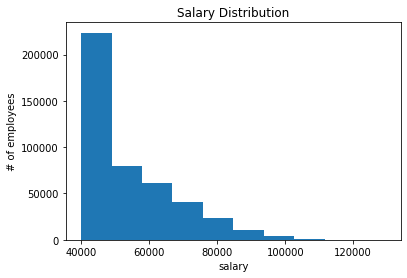

In [24]:
plt.hist(MergedDF["salary"])
plt.xlabel("salary")
plt.ylabel("# of employees")
plt.title("Salary Distribution")

In [27]:
AvgSalaryByTitle = merged_df.groupby("title")["salary"].mean()
AvgSalaryByTitle

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

Text(0, 0.5, 'Salary')

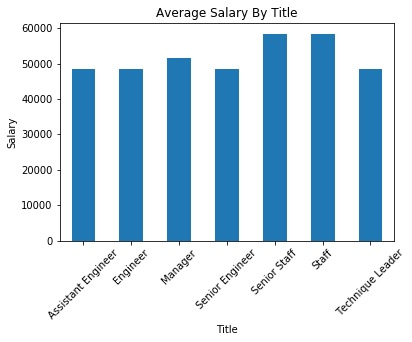

In [42]:
fig = AvgSalaryByTitle.plot(kind = "bar", rot=45, title = "Average Salary By Title")
fig.set_xlabel("Title")
fig.set_ylabel("Salary")